# Spectrogram Reading Seminar, Lecture 3
# Manner of Articulation
Mark Hasegawa-Johnson
January 31, 2018

## Table of Contents
1. Downloading the python sgram library
2. Downloading examples of the English consonants
3. The two-bit definition of manner: glides, nasals, fricatives, and stops
4. sonorant
5. continuant

## 1. Downloading the python sgram library
The key functions from lectures 1 and 2 (https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms1_wideband_narrowband.html) are now available in a library that you can download: https://courses.engr.illinois.edu/ece590sip/sp2018/sgram.py .  The following code might or might not work, depending on your system's security settings.  If it does work, it should load sgram.py into your environment, and then show the docstring for the sgram.sgram function.

In [3]:
import urllib.request as request
import io
sgram_url = 'https://courses.engr.illinois.edu/ece590sip/sp2018/sgram.py'
sgram_dot_py_whole_program_as_one_long_string = request.urlopen(sgram_url).read()
with open('sgram.py','wb') as f:
    f.write(sgram_dot_py_whole_program_as_one_long_string)
import sgram
sgram.sgram?

## 2. Downloading examples of the English consonants
Today I want to talk about manner of articulation of consonants.  So let's download example audio files for all of the English consonants from wikipedia.

WARNING: the pathnames listed below are the pathnames on wikipedia as of Jan 30, 2018.  They might change in the future.  If one of the pathnames changes in the future, you will get an HTTPError, and the "except request.HTTPError" clause in the code below will print out the URL that is missing.  If that happens, you should go to https://en.wikipedia.org/wiki/International_Phonetic_Alphabet, find the phoneme that is missing, find the javascript that plays it, click the "source" link under that javascript, find the OGG filename on the page that opens up, right-click on the filename and choose "copy link address" to get the complete URL, then update just the changed part in the pathname dictionary below.

In [4]:
import soundfile as sf
import io
consonant_pathnames = {
        'w' : 'f/f2/Voiced_labio-velar_approximant',
        'r' : '3/33/Postalveolar_approximant',
        'l' : 'b/bc/Alveolar_lateral_approximant',
        'j' : 'e/e8/Palatal_approximant',
        'm' : 'a/a9/Bilabial_nasal',
        'n' : '2/29/Alveolar_nasal',
        'ŋ' : '3/39/Velar_nasal',
        'f' : '3/33/Voiceless_labiodental_fricative',
        'v' : '8/85/Voiced_labiodental_fricative',
        'θ' : '8/80/Voiceless_dental_fricative',
        'ð' : '6/6a/Voiced_dental_fricative',
        's' : 'a/ac/Voiceless_alveolar_sibilant',
        'z' : 'c/c0/Voiced_alveolar_sibilant',
        'ʃ' : 'c/cc/Voiceless_palato-alveolar_sibilant',
        'ʒ' : '3/30/Voiced_palato-alveolar_sibilant',
        'p' : '5/51/Voiceless_bilabial_plosive',
        'b' : '2/2c/Voiced_bilabial_plosive',
        't' : '0/02/Voiceless_alveolar_plosive',
        'd' : '0/01/Voiced_alveolar_plosive',
        'k' : 'e/e3/Voiceless_velar_plosive',
        'g' : '1/12/Voiced_velar_plosive_02'
}

consonant_waves = {}

for c_ipa,c_pathname in consonant_pathnames.items():
    c_url = 'https://upload.wikimedia.org/wikipedia/commons/{}.ogg'.format(c_pathname)
    try:
        req = request.urlopen(c_url)
    except request.HTTPError:
        print('Unable to download {}'.format(c_url))
    else:
        c_wav,c_fs = sf.read(io.BytesIO(req.read()))
        c_filename = c_pathname[5:] + '.wav'
        sf.write(c_filename,c_wav,c_fs)
        consonant_waves[c_ipa] = c_wav

print('Donwnloaded these phones: {}'.format(consonant_waves.keys()))

Donwnloaded these phones: dict_keys(['w', 'r', 'l', 'j', 'm', 'n', 'ŋ', 'f', 'v', 'θ', 'ð', 's', 'z', 'ʃ', 'ʒ', 'p', 'b', 't', 'd', 'k', 'g'])


Let's just check to make sure that we have the waveforms, and we can compute a spectrogram:

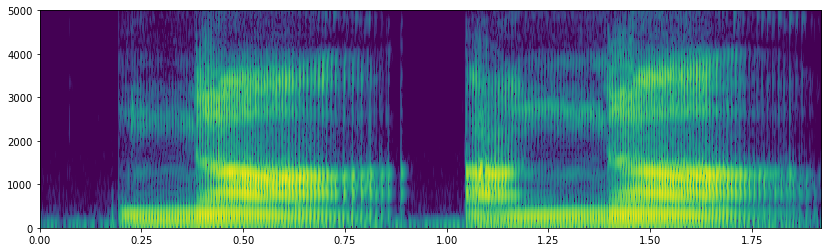

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
(x_sgram,x_extent)=sgram.sgram(consonant_waves[ 'ŋ'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
plt.figure(figsize=(14,4))
plt.imshow(x_sgram,origin='lower',extent=x_extent,aspect='auto')

## 3. A two-bit definition of manner

IPA has an overly complicated definition of "manner of articulation," which leads people to the mistaken idea that speech is more complicated than non-speech.  It isn't, really. There are only four manner classes that differ in an important way.  They are:
1. Vowels, Glides, and Liquids are [+sonorant, +continuant]
2. Nasals are [+sonorant, -continuant]
3. Fricatives are [-sonorant, +continuant]
4. Stops, Clicks, and Silences are [-sonorant, -continuant]

Here's that same list in the form of a table:

|                       | [+sonorant] | [-sonorant]       |
|-------------------|:----------------:|:------------------:|
| [+continuant] | Vowel, Glide | Fricative         |
| [-continuant]  | Nasal            | Stop, Silence |

## 4. sonorant
The feature [+sonorant] means that there is full-strength voicing.  Full-strength voicing happens when there is no buildup of pressure inside the vocal tract---all of the pressure drop is from below the glottis (lung pressure) to above the glottis (room pressure).   

The alternative is a [-sonorant] consonant, also known as "obstruent."  

An obstruent consonant can be voiced, but its voicing is always weaker than the corresponding sonorant.  Voicing for the sonorant consonant fills up the entire frequency band from 0Hz to 800Hz, and continues full strength without dying away at any particular time.  Voicing for the obstruent consonant is limited to only the very lowest frequencies, maybe just 0Hz to 200Hz, and it dies away to almost nothing in the middle of the consonant.

### 4a. Example 1: /j/ vs. /ʒ/
First, let's consider the consonants /j/ (a palatal glide, as in "yacht") and /ʒ/ (a palatal voiced fricative, as in "azure").  Both are made with the tongue body raised up toward the hard palate (so we say that they have "palatal" place of articulation).  Neither has the airflow cut off entirely (i.e., both are [+continuant]), but /ʒ/ has a tighter constriction, so the air pressure between the glottis and the tongue body constriction is raised.  This raised air pressure, inside the mouth, causes voicing to have a reduced amplitude.  Even more visible in the spectrogram: (1) voicing for /ʒ/ only covers the frequency band up to about 300Hz, whereas for /j/ you can see the voiced energy up to about 800Hz, (2) for /ʒ/, you can also see frication at high frequencies around 2000Hz, whereas for /j/, the energy at around 2000Hz is still periodic voiced energy. 

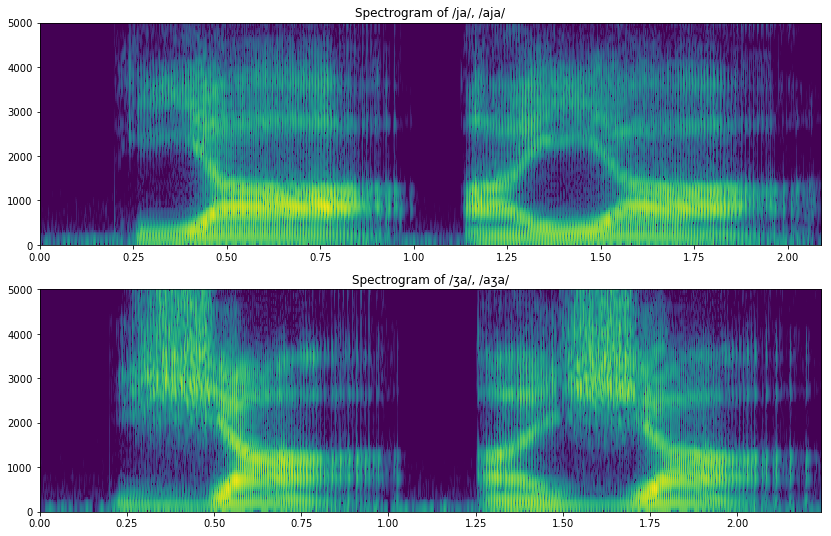

In [5]:
(j_sgram,j_extent)=sgram.sgram(consonant_waves[ 'j'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
(zh_sgram,zh_extent)=sgram.sgram(consonant_waves['ʒ'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
plt.figure(figsize=(14,9))
plt.subplot(211)
plt.imshow(j_sgram,origin='lower',extent=j_extent,aspect='auto')
plt.title('Spectrogram of /ja/, /aja/')
plt.subplot(212)
plt.imshow(zh_sgram,origin='lower',extent=zh_extent,aspect='auto')
plt.title('Spectrogram of /ʒa/, /aʒa/')

### 4b. Example: /w/ vs. /v/
For another example, consider the labial glide /w/, and the labial voiced fricative /v/.  These have almost the same place of articulation (or as close as you can get in English, anyway).  They are both voiced, and both [+continuant].  But /v/ has a tighter constriction, so pressure inside the vocal tract is raised, therefore it  is [-sonorant].  --- Notice from the images below that, unlike /ʒ/, the consonant /v/ actually has very little frication energy.  The main difference between /w/ and /v/ is not the frication energy, it's the bandwidth and stability of voicing --- /w/ has stable voicing with 800Hz bandwidth all the way through the closure, while the first formant of /v/ has a bandwidth of only about 300Hz, and its energy decreases toward the last half of the consonant closure.

In all fairness, this is one of the hardest comparisons on the worksheet today.  There is one auxiliary cue that's not just about the feature [sonorant], it's actually about the difference between bilabial articulation (/w/) versus labiodental articulation (/v/).  Notice that, in the vowel /a/, there are two formants at about 900Hz and 1100Hz.  For the /w/, both of those formants drop, to about 200Hz and 500Hz.  For the /v/, only the first formant drops (to about 200Hz); the second formant stays high, above 1000Hz.  That's the difference between bilabial versus labiodental articulation; it has nothing at all to do with the feature [sonorant].

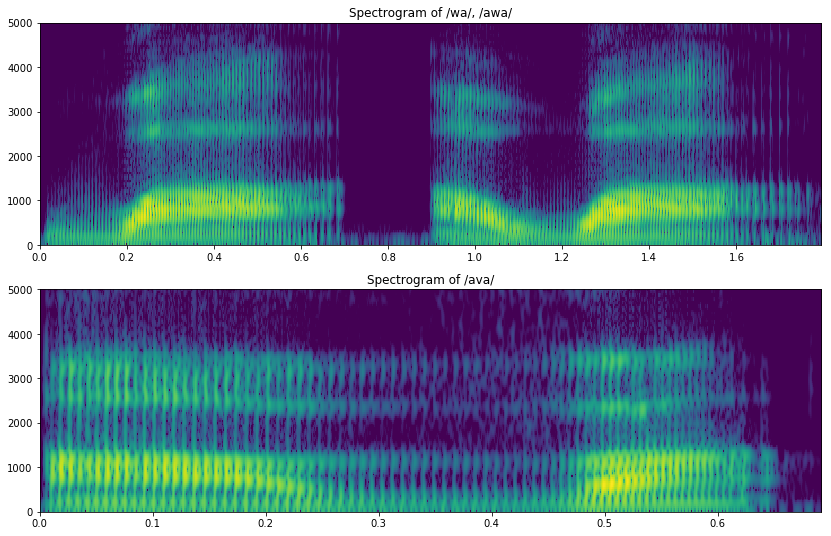

In [7]:
(w_sgram,w_extent)=sgram.sgram(consonant_waves[ 'w'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
(v_sgram,v_extent)=sgram.sgram(consonant_waves['v'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
plt.figure(figsize=(14,9))
plt.subplot(211)
plt.imshow(w_sgram,origin='lower',extent=w_extent,aspect='auto')
plt.title('Spectrogram of /wa/, /awa/')
plt.subplot(212)
plt.imshow(v_sgram,origin='lower',extent=v_extent,aspect='auto')
plt.title('Spectrogram of /ava/')

### 4c. Example: /m/ vs. /b/
Now consider the nasal consonant /m/ and the stop consonant /b/.  Both are voiced, both are made with the lips.  Both are made with a complete closure of the vocal tract, so they're [-continuant].  But when the lips close on /m/, the velum is open, so that air can escape through the nose, and therefore pressure never builds up inside the vocal tract.  For this reason /m/ is [+sonorant], but /b/ is [-sonorant].

In comparing /ama/ versus /aba/, notice that there's a difference in the bandwidth of voicing, but both of them are a little narrower than they would be for /awa/ and /ava/.  In /ama/, voicing has a bandwidth of around 500Hz; in /aba/, it has a bandwidth of around 200Hz.   The /ama/ closure also shows energy at the higher formant frequencies ---- these are actually the so-called "nasal formants," i.e., they are the resonant frequencies of the mouth and nose together, not just of the mouth.   The nasal formants are much lower in energy than the corresponding vowel formants.  Their frequencies are much more predictable than vowel formants: (1) the frequency doesn't change as the tongue move, it stays at the same frequency all the way through closure, (2) almost everybody has their second nasal formant at 1000Hz, their third at 1900Hz, and their fourth nasal formant at 2500Hz.  Vowel formants are higher in energy, but less predictable in frequency.

In comparing /ma/ versus /ba/ (at the beginning of each spectrogram), notice that there is a long sonorant voiced region corresponding to the /m/.  For the /b/, there's nothing but silence until the lips release.

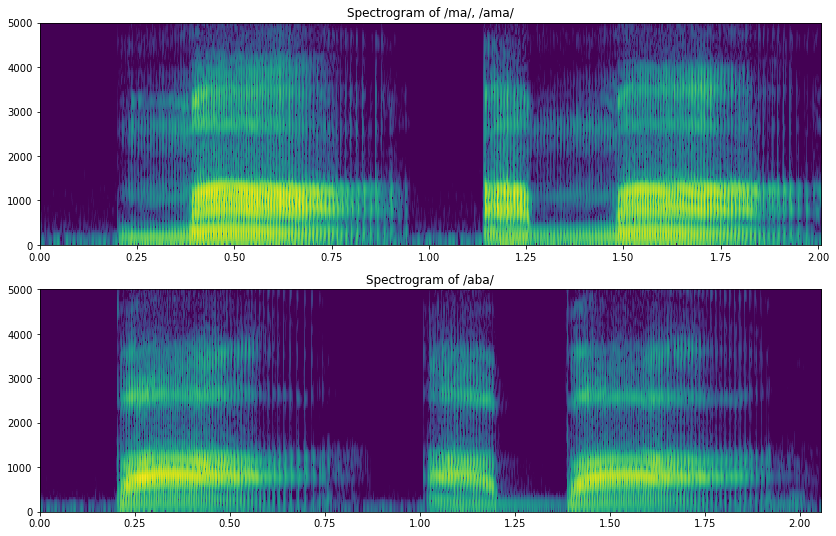

In [11]:
(m_sgram,m_extent)=sgram.sgram(consonant_waves[ 'm'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
(b_sgram,b_extent)=sgram.sgram(consonant_waves['b'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
plt.figure(figsize=(14,9))
plt.subplot(211)
plt.imshow(m_sgram,origin='lower',extent=m_extent,aspect='auto')
plt.title('Spectrogram of /ma/, /ama/')
plt.subplot(212)
plt.imshow(b_sgram,origin='lower',extent=b_extent,aspect='auto')
plt.title('Spectrogram of /aba/')

### 4d. Example: /ana/ vs. /ada/
Now let's consider the nasal consonant /n/ versus the voiced stop /d/.  Both of these are alveolar place of articulation, meaning they are made with the tongue tip pushed against the alveolar ridge -- the bony ridge about 1cm behind the teeth.

Notice that the nasal formants are at almost the same frequencies for /n/ as they were for /m/.  The stability of nasal consonants is their defining attribute.

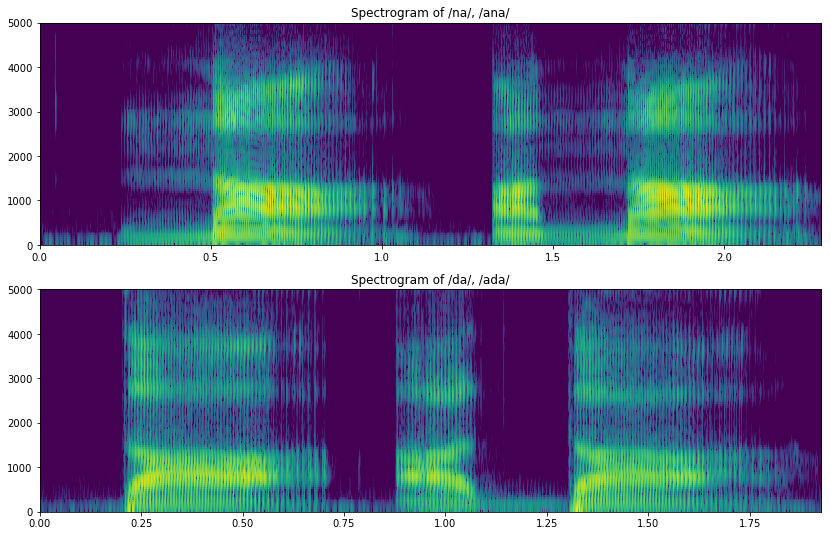

In [10]:
(n_sgram,n_extent)=sgram.sgram(consonant_waves[ 'n'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
(d_sgram,d_extent)=sgram.sgram(consonant_waves['d'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
plt.figure(figsize=(14,9))
plt.subplot(211)
plt.imshow(n_sgram,origin='lower',extent=n_extent,aspect='auto')
plt.title('Spectrogram of /na/, /ana/')
plt.subplot(212)
plt.imshow(d_sgram,origin='lower',extent=d_extent,aspect='auto')
plt.title('Spectrogram of /da/, /ada/')

## 5. continuant

A continuant sound (feature value [+continuant]) is one for which air flow continues to flow through the mouth.  A discontinuant sound (feature value [-continuant]) is one for which the mouth is completely obstructed.

The defining acoustic feature of a discontinuant sound is a sharp discontinuity along the time axis, at the instant of consonant closure, and another sharp discontinuity at the instant of consonant release.

### 5a. Example: /w/ versus /m/
The two bilabial sonorant consonants /w/ versus /m/ are distinguished only by the feature [continuant]: /w/ is [+continuant], while /m/ is [-continuant]. 

Notice that /m/ has a sharp discontinuity when the lips are closed or released, whereas /w/ has a much more gradual glide.

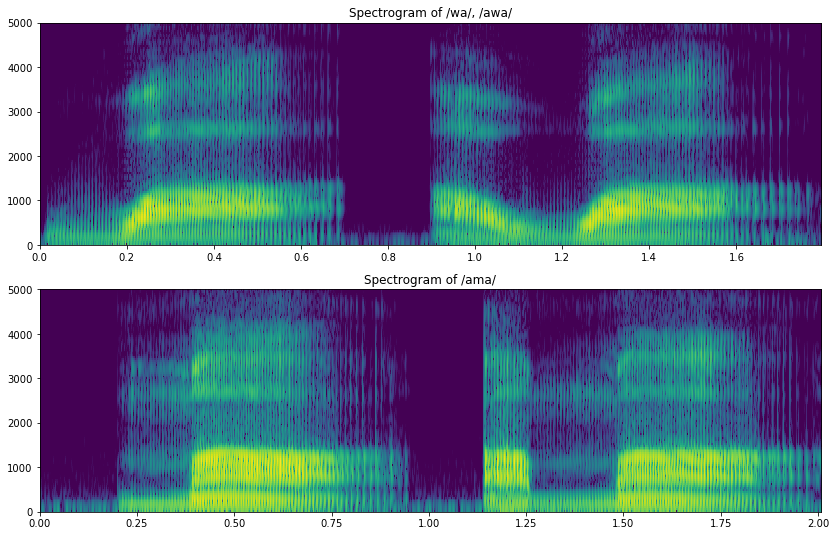

In [13]:
plt.figure(figsize=(14,9))
plt.subplot(211)
plt.imshow(w_sgram,origin='lower',extent=w_extent,aspect='auto')
plt.title('Spectrogram of /wa/, /awa/')
plt.subplot(212)
plt.imshow(m_sgram,origin='lower',extent=m_extent,aspect='auto')
plt.title('Spectrogram of /ama/')

### 5b. Example: /j/ versus /ŋ/
Now consider the tongue body glide /j/ versus the tongue body nasal consonant /ŋ/.  The glide /j/ is always made with the tongue body pushed forward against the hard palate (palatal place of articulation); the nasal /ŋ/ can be made with the tongue body pushed forward (palatal) or backward (velar), both productions are considered the same sound in English.

Notice, again, the difference in the abruptness of the discontinuity.  It looks kind of like, in /ŋa/, the energy of the formant "jumps up" at release, from the low energy of the nasal consonant to the high energy of the vowel.  In /ja/, by contrast, the formants have their high vowel-like energy even during the tightest consonant constriction; the main change from consonant to vowel is the frequency of the formant, with only a subtle change in its energy.

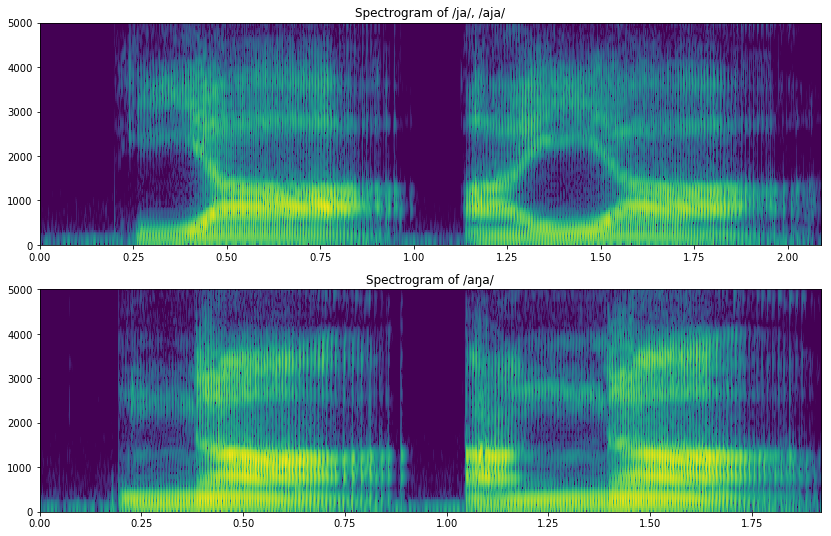

In [15]:
(ng_sgram,ng_extent)=sgram.sgram(consonant_waves[ 'ŋ'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
plt.figure(figsize=(14,9))
plt.subplot(211)
plt.imshow(j_sgram,origin='lower',extent=j_extent,aspect='auto')
plt.title('Spectrogram of /ja/, /aja/')
plt.subplot(212)
plt.imshow(ng_sgram,origin='lower',extent=ng_extent,aspect='auto')
plt.title('Spectrogram of /aŋa/')

### 5c. Example: /s/ versus /t/
Consider the fricative /s/ versus the stop consonant /t/.  Both are unvoiced (feature [-voice]), made with the tongue tip against the alveolar ridge.  The fricative is [+continuant], meaning that air continues to flow all during the consonant closure: in this case, the airflow is evidenced by lots and lots of frication energy during closure.

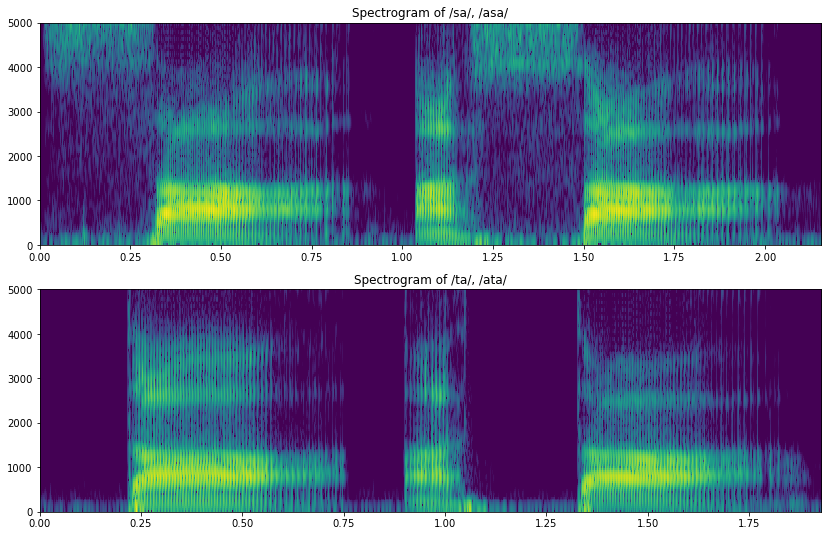

In [16]:
(s_sgram,s_extent)=sgram.sgram(consonant_waves[ 's'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
(t_sgram,t_extent)=sgram.sgram(consonant_waves['t'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
plt.figure(figsize=(14,9))
plt.subplot(211)
plt.imshow(s_sgram,origin='lower',extent=s_extent,aspect='auto')
plt.title('Spectrogram of /sa/, /asa/')
plt.subplot(212)
plt.imshow(t_sgram,origin='lower',extent=t_extent,aspect='auto')
plt.title('Spectrogram of /ta/, /ata/')

### 5d. Example: /ð/ versus /d/
Finally, consider the voiced fricative /ð/ versus the voiced stop /d/.  Both are made with the tongue tip.  The fricative /ð/ is called "dental" because it's made with the tongue touching the teeth, or even between the teeth.  The stop /d/ is called "alveolar" because the tongue usually doesn't touch the teeth, it's usually touching the alveolar ridge behind the teeth.

The fricatives /ð/ and /v/ have less frication energy, during closure, than any other fricatives in English (notice, in fact, how much /aða/ looks like /ava/).  

Nevertheless, you can see the difference between the [+continuant] sound /ð/ versus the [-continuant] sound /d/, based on the amount of discontinuity at the consonant release and closure.  (Notice, for example, how much /da/ looks like /ba/: no energy at all until the tongue tip release).

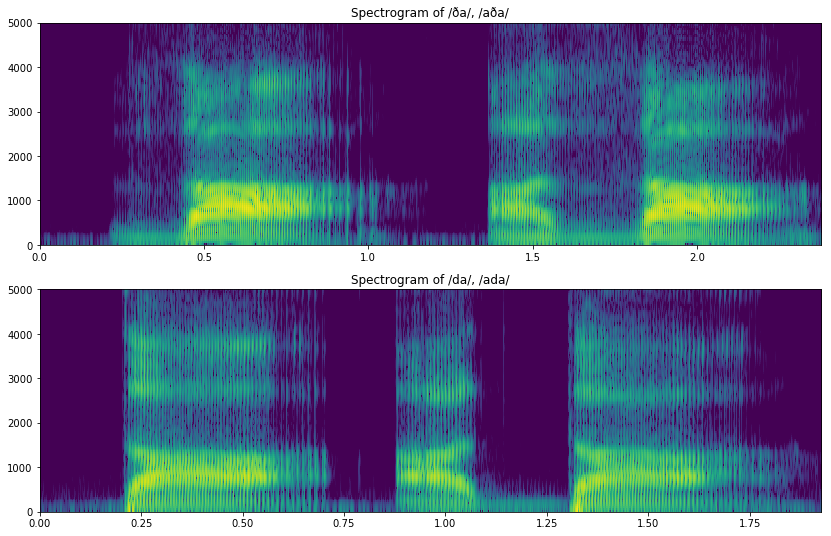

In [18]:
(dh_sgram,dh_extent)=sgram.sgram(consonant_waves[ 'ð'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
(t_sgram,t_extent)=sgram.sgram(consonant_waves['t'], int(0.001*c_fs), int(0.006*c_fs), 1024, c_fs, 5000)
plt.figure(figsize=(14,9))
plt.subplot(211)
plt.imshow(dh_sgram,origin='lower',extent=dh_extent,aspect='auto')
plt.title('Spectrogram of /ða/, /aða/')
plt.subplot(212)
plt.imshow(d_sgram,origin='lower',extent=d_extent,aspect='auto')
plt.title('Spectrogram of /da/, /ada/')

## 6. Mystery word
The following file contains one word of English.  What word is it?

Hint: it has three consonants.  Is each consonant a stop, fricative, nasal or glide?

In [6]:
x_url = 'http://courses.engr.illinois.edu/ece590sip/sp2018/mystery1.ogg'
try:
    req = request.urlopen(x_url)
except request.HTTPError:
    print('Unable to download {}'.format(x_url))
else:
    x_wav,x_fs = sf.read(io.BytesIO(req.read()))
    sf.write('mystery1.wav',x_wav,x_fs)

print('Donwnloaded  {}'.format(x_url))

Donwnloaded  http://courses.engr.illinois.edu/ece590sip/sp2018/mystery1.ogg


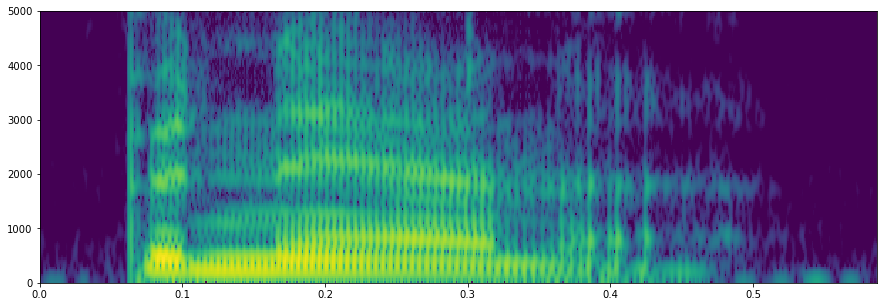

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
(x_sgram,x_extent)=sgram.sgram(x_wav, int(0.001*x_fs), int(0.006*x_fs), 1024, x_fs, 5000)
plt.figure(figsize=(15,5))
plt.imshow(x_sgram,origin='lower',extent=x_extent,aspect='auto')